In [2]:
import torch
from torch_geometric.data import Data

C:\Users\nadin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
import pandas as pd
import numpy as np
busses = pd.read_excel('Busses_Timeseries_Table_Set2022_Solution_Store_ExcelEdit.xlsx')
edges = pd.read_excel('Edges_Timeseries_Table_Set2022_Sample_ExcelEdit.xlsx')

In [18]:
edges

,datetime_beginning_utc,From Number,To Number,X,Lim MVA A
0,2022-06-01 12:00:00,0,1,0.057500,1300.000000
1,2022-06-01 12:00:00,0,2,0.165200,1300.000000
2,2022-06-01 12:00:00,0,30,0.197976,619.130435
3,2022-06-01 12:00:00,1,3,0.173700,650.000000
4,2022-06-01 12:00:00,1,4,0.198300,1300.000000
...,...,...,...,...,...
41995,2023-06-01 01:00:00,24,26,0.208700,619.130435
41996,2023-06-01 01:00:00,26,28,0.415300,619.130435
41997,2023-06-01 01:00:00,26,29,0.602700,619.130435
41998,2023-06-01 01:00:00,27,26,0.396000,619.130435


In [32]:
#Functions to create graph from (busses, edges)-sample

def sourceNodes(timestamp):
    source = edges.loc[edges['datetime_beginning_utc'] == timestamp, 'From Number']
    target = edges.loc[edges['datetime_beginning_utc'] == timestamp, 'To Number']
    sourceNp = pd.concat([source, target]).to_numpy()
    targetNp = pd.concat([target, source]).to_numpy()
    return (sourceNp, targetNp)
    
def nodeAttributes(timestamp):
    attributes = busses.loc[busses['datetime_beginning_utc'] == timestamp, ['mw_norm', 'incremental_price', 'inter_start_cost', 'min_ecomin', 'max_ecomax']]
    #return attributes.to_records(index=False)
    return attributes.to_numpy()
    
def edgeAttributes(timestamp):
    return edges.loc[edges['datetime_beginning_utc'] == timestamp, ['X', 'Lim MVA A']].to_numpy()

def solAttributes(timestamp):
    attributes = busses.loc[busses['datetime_beginning_utc'] == timestamp, ['solTheta', 'solGenerate']]
    return attributes.to_numpy()
    

In [20]:
len(timestamps)

1000

In [51]:
#Generate graphs from data

timestamps = busses['datetime_beginning_utc'].unique()
numGraph = len(timestamps)
data = np.empty(numGraph, dtype=Data)

timeInterval = 0
for timeInterval in range(numGraph): #range(2):   
    timestamp = pd.Timestamp(timestamps[timeInterval])
    source, targets = sourceNodes(timestamp)
    edge_index = torch.tensor([source, targets], dtype=torch.long)
    x = torch.tensor(nodeAttributes(timestamp), dtype=torch.float) #(P_D, c, h, P_G_min, P_G_max)
    y = torch.tensor(solAttributes(timestamp), dtype=torch.float)
    edge_attr = torch.tensor(edgeAttributes(timestamp), dtype=torch.float) #(B, Pmax)
    
    data[timeInterval] = Data(x=x, y=y, edge_index=edge_index, edge_attr = edge_attr)
    

In [52]:
data

array([Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 

In [35]:
data[0].num_nodes

31

In [54]:
#Shuffle
perm = torch.randperm(len(data))
dataset = data[perm]
dataset

array([Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 84], edge_attr=[42, 2], y=[31, 2]),
       Data(x=[31, 5], edge_index=[2, 

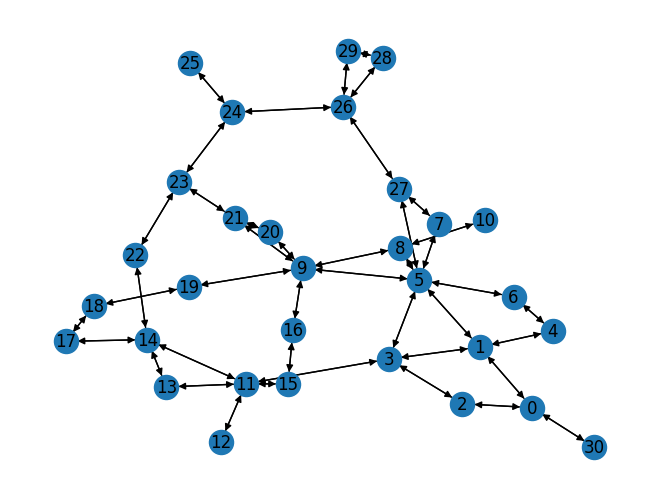

In [24]:
#networkx and matplot to print graph
import networkx as nx
from matplotlib import pyplot as plt
from torch_geometric.utils import to_networkx
g = to_networkx(data[0])
nx.draw(g, with_labels=True)

{0: Text(0.7767118307512536, 0.0380268385143548, '1.045,21.505539,20427.25,40.5,101.25'),
 1: Text(0.4910240651883138, -0.05012001406630839, '9.39,44.627636,52.5,25.0,46.9'),
 2: Text(0.6200966901608078, -0.017681288429706277, '7.51,0.0,0.0,0.0,0.0'),
 3: Text(0.3463322034631205, -0.1253570288082323, '1.35,0.0,0.0,0.0,0.0'),
 4: Text(0.6066627278577799, -0.2089532708656172, '14.61,44.627636,52.5,25.0,46.9'),
 5: Text(0.14208239612338489, -0.054387535030692144, '12.43,0.0,0.0,0.0,0.0'),
 6: Text(0.41049859981611153, -0.1931665438836662, '7.43,0.0,0.0,0.0,0.0'),
 7: Text(0.1653607726234345, 0.17908465876656005, '23.23,44.627636,52.5,25.0,46.9'),
 8: Text(-0.06127685632234456, -0.32948024510473206, '4.5,0.0,0.0,0.0,0.0'),
 9: Text(-0.2541463986251753, -0.20299722594433695, '6.67,0.0,0.0,0.0,0.0'),
 10: Text(-0.12748365491685498, -0.6119278409454282, '25.57,46.061794,44.74,25.0,44.92'),
 11: Text(0.10769569513605998, -0.32772723047145913, '4.34,0.0,0.0,0.0,0.0'),
 12: Text(0.24957829867887

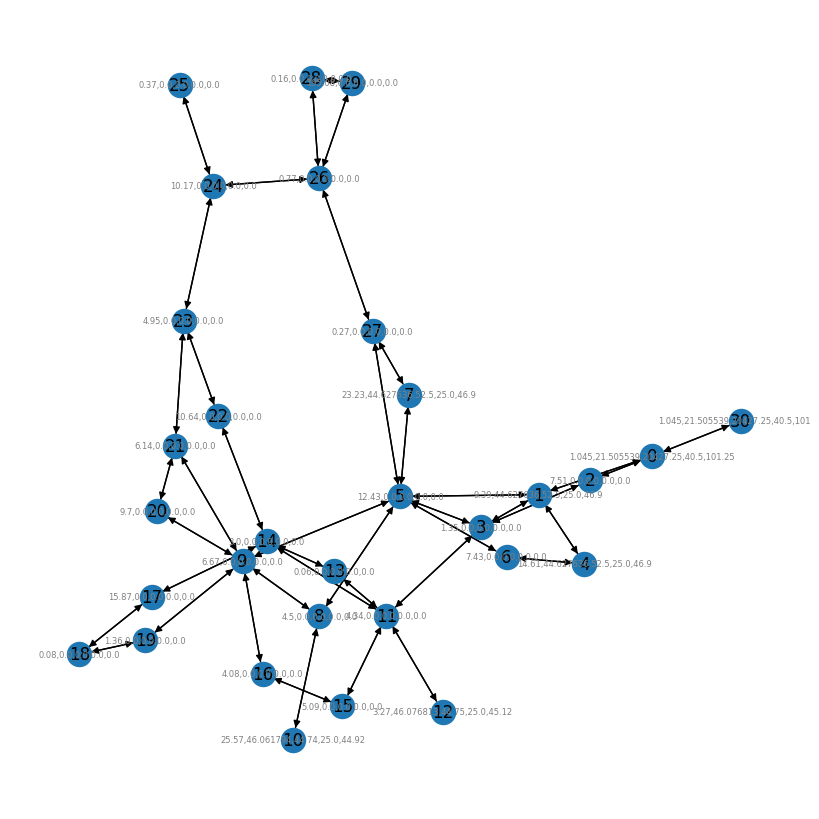

In [11]:
#Print Graph with Attributes
import networkx as nx
from matplotlib import pyplot as plt
from torch_geometric.utils import to_networkx

graph = data[0]

timestamp = pd.Timestamp(timestamps[0])
nodeAttributes = graph['x'].numpy()
np.round(nodeAttributes, 2)
nodeAttributes = [",".join(item) for item in nodeAttributes.astype(str)]
nodeAttributes = dict(enumerate(nodeAttributes))
nx.set_node_attributes(g, values = nodeAttributes, name='state')

node_labels = nx.get_node_attributes(g, 'state')
pos = nx.spring_layout(g)
plt.figure(4,figsize=(8,8)) 
nx.draw(g, pos=pos, with_labels=True)
nx.draw_networkx_labels(g, pos, labels = node_labels, font_size=6, font_color="gray")

In [12]:
import torch_geometric_temporal
from torch_geometric_temporal.signal.dynamic_graph_temporal_signal import DynamicGraphTemporalSignal

In [36]:
# Temporal data snapshots are PyTorch Geometric data object for each snapshot
# Iterated by DynamicGraphTemporalSignalBatch

timestamps = busses['datetime_beginning_utc'].unique()
numGraph = len(timestamps)
data = np.empty(numGraph, dtype=Data)
edge_indices = list()
edge_weights = list()
features = list()
targets = list()

timeInterval = 0
for timeInterval in range(numGraph):  
    timestamp = pd.Timestamp(timestamps[timeInterval])
    source, target = sourceNodes(timestamp)
    edge_indices.append(torch.tensor([source, target], dtype=torch.long))
    features.append(torch.tensor(nodeAttributes(timestamp), dtype=torch.float)) #(P_D, c, h, P_G_min, P_G_max)
    targets.append(torch.tensor(solAttributes(timestamp), dtype=torch.float))
    edge_weights.append(torch.tensor(edgeAttributes(timestamp), dtype=torch.float)) #(B, Pmax)
    
dataset = DynamicGraphTemporalSignal(edge_indices, edge_weights, features, targets)

In [26]:
dataset

In [37]:
from torch_geometric_temporal.signal import temporal_signal_split
# A split of dataset taking DynamicSignal object, later snapshots contribute to test set, splits along ratio
train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.8)

In [38]:
# (Dynamic Convolutional) Recurrent Graph Neural Netrork, DCRNN layer & feedworward layer
# non-linearity after Conv layer through functions (relu)
# Linear Funciton as regression
# WE have Non-zero-mean target (?, maximum likelihood) - check function/design from other papers
import torch.nn.functional as F
from torch_geometric_temporal.nn.recurrent import DCRNN

class RecurrentGCN(torch.nn.Module):
    def __init__(self, node_features, filters):
        super(RecurrentGCN, self).__init__()
        self.recurrent = DCRNN(node_features, filters, 2) #Arguments: In, out (hyper-param #output features, many are good), K (#neighbors/steps - take 2)
        self.linear = torch.nn.Linear(filters, 2) #we have 2 outputs

    def forward(self, x, edge_index, edge_weight):
        h = self.recurrent(x, edge_index, edge_weight) #Diffusion Convolutional Recurrent Neural Network
        # Graph Convolution with GRU 
        h = F.relu(h) #non-linearity
        h = self.linear(h) # Regression task (0-mean?, produce 0, send 0)
        return h

In [39]:
from tqdm import tqdm

model = RecurrentGCN(node_features=5, filters=40)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()

for epoch in tqdm(range(200)): #train in 200 epochs
    cost = 0
    for time, snapshot in enumerate(train_dataset):
        y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
        #cost = cost + torch.mean((y_hat-snapshot.y)**2) #need to aggregate multiple outputs into function, nn.MSELoss()
        cost = cost + nn.MSELoss(y_hat, snapshot.y)
    cost = cost / (time+1)
    cost.backward()
    optimizer.step()
    optimizer.zero_grad()

  0%|          | 0/200 [00:00<?, ?it/s]


AttributeError: 'torch.dtype' object has no attribute 'kind'